In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from tkmodel.TwoCUM_copy import TwoCUMfittingConc
from tkmodel.TwoCUM_copy import TwoCUM

In [3]:
AIF = np.load("data/AIF.npy")
series = np.load("data/Example_Conc.npy")

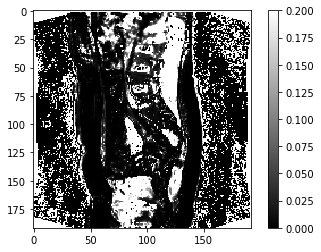

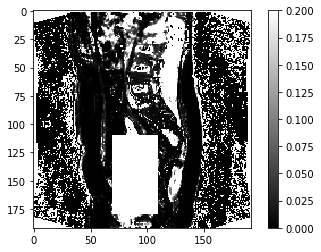

' \nx: 60 to 110 \ny: 110 to 180\nz: 0 to 29\n'

In [3]:
plt.imshow(series[:,:,20,100], clim = [0,0.2], cmap = 'gray')
plt.colorbar()
plt.show()

series[110:180, 70:110, 0:29, :] = 10
plt.imshow(series[:,:,20,100], clim = [0,0.2], cmap = 'gray')
plt.colorbar()
plt.show()
''' 
x: 60 to 110 
y: 110 to 180
z: 0 to 29
'''

In [4]:
#For the uterus?
series = np.load("data/Example_Conc.npy")
t = np.arange(0,366,2.45)

no_list1 = []

E_list1 = []
Fp_list1 = []
vp_list1 = []

ilist = np.arange(135, 180)
jlist = np.arange(70, 110)
klist = np.arange(0, 29)
range_dict1 = {}
index_list = []
for i in ilist:
    print(i)
    for j in jlist:
        for k in klist:
            if np.isnan(series[i,j,k,:]).all() == True:
                print('OUT: ', i,j,k)
                print('min : max', series[i,j,k,:].min(), series[i,j,k,:].max())
                continue
            
                
            else:
                try:
                    fitted_param = TwoCUMfittingConc(t, AIF, series[i,j,k,:] , 0)
                except ValueError as e:
                    print('Caught Value Error')
                    no_list1.append((i,j,k))
                    continue

                E_list1.append(fitted_param[0])
                Fp_list1.append(fitted_param[1])
                vp_list1.append(fitted_param[2])
                index_list.append((i,j,k))

135


/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:136: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(temp**2))
/usr/lib/python3/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:34: RuntimeWarning: overflow encountered in exp
  exptTp=np.exp(-1*t/Tp)


Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value

Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
141
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught V

Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
148
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught V

Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
155
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught V

Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
161
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught V

Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value

Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value

/afs/inf.ed.ac.uk/user/s17/s1740929/MRI_ML/tkmodel/TwoCUM_copy.py:38: RuntimeWarning: overflow encountered in multiply
  temp=np.convolve(AIF,R)*t[1]


Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
169
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught Value Error
Caught V

In [5]:
new = np.array(index_list)
new

array([[135,  70,   0],
       [135,  70,   1],
       [135,  70,   2],
       ...,
       [179, 109,  26],
       [179, 109,  27],
       [179, 109,  28]])

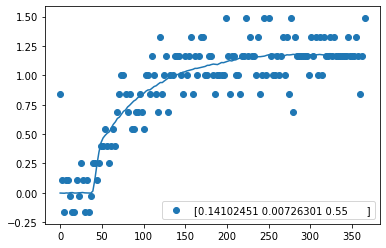

In [6]:
E_list = np.array(E_list1)
Fp_list = np.array(Fp_list1)
vp_list = np.array(vp_list1)

E_list = E_list[None,:]
Fp_list = Fp_list[None, :]
vp_list = vp_list[None, :]

E_Fp = np.concatenate((E_list, Fp_list), axis =0)
y = np.concatenate((E_Fp, vp_list), axis =0)
y = y.T

x = np.zeros( (len(E_list1), 150) )

for i, index in enumerate(index_list):
    x[i] = series[index[0], index[1], index[2],:]
    
j = 20019

plt.scatter(t, x[j], label = str(y[j]))
fitted_curve = TwoCUM(y[j], t, AIF, 0)
plt.plot(t, fitted_curve)
plt.legend()
plt.show()

In [7]:
np.save('trained_models/data/test_x.npy', x)
np.save('trained_models/data/test_y.npy', y)

In [4]:
first_half_x = np.load('trained_models/data/110_135_test_x.npy')
first_half_y = np.load('trained_models/data/110_135_test_y.npy')

second_half_x = np.load('trained_models/data/135_180_test_x.npy')
second_half_y = np.load('trained_models/data/135_180_test_y.npy')

In [6]:
first_half_x.shape, second_half_x.shape, first_half_y.shape, second_half_y.shape

((27438, 150), (48816, 150), (27438, 3), (48816, 3))

In [15]:
full_x = np.concatenate((first_half_x, second_half_x))
full_y = np.concatenate((first_half_y, second_half_y))


In [16]:
testx = np.load('trained_models/data/test_x.npy')
testy = np.load('trained_models/data/test_y.npy')

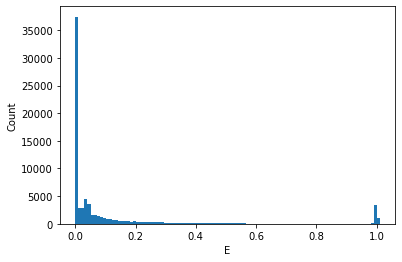

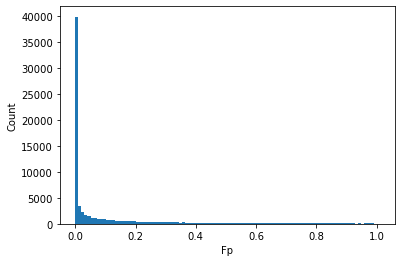

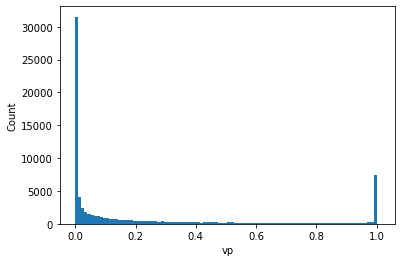

<Figure size 432x288 with 0 Axes>

In [11]:
plt.hist(testy[:,0],range=[0, 1.01], bins = 100)
plt.xlabel('E')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(100*testy[:,1],range=[0, 1.01], bins = 100)
plt.xlabel('Fp')
plt.ylabel('Count')
plt.show()
plt.clf()

plt.hist(testy[:,2],range=[0, 1.01], bins = 100)
plt.xlabel('vp')
plt.ylabel('Count')
plt.show()
plt.clf()

[('pk_train_loss', []), ('pk_val_loss', [])]

train_loss []
val_loss []


(76254, 150)